In [1]:
#Import dependencies
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Read in csv file
region_path = "Resources/region.csv"
region = pd.read_csv(region_path)
region

,Country,Year,Region,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Eastern Mediterranean,Developing,65.0,263.0,62,0.01,71.279624,65.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Eastern Mediterranean,Developing,59.9,271.0,64,0.01,73.523582,62.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Eastern Mediterranean,Developing,59.9,268.0,66,0.01,73.219243,64.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Eastern Mediterranean,Developing,59.5,272.0,69,0.01,78.184215,67.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Eastern Mediterranean,Developing,59.2,275.0,71,0.01,7.097109,68.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Africa,Developing,44.3,723.0,27,4.36,0.000000,68.0,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Africa,Developing,44.5,715.0,26,4.06,0.000000,7.0,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Africa,Developing,44.8,73.0,25,4.43,0.000000,73.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Africa,Developing,45.3,686.0,25,1.72,0.000000,76.0,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
#list of column names
# region.rename(columns={" BMI ": "BMI"})
# region.drop([' BMI '], axis=1)
sorted(region)

[' HIV/AIDS',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Adult Mortality',
 'Alcohol',
 'BMI',
 'Country',
 'Diphtheria ',
 'GDP',
 'Hepatitis B',
 'Income composition of resources',
 'Life expectancy',
 'Measles ',
 'Polio',
 'Population',
 'Region',
 'Schooling',
 'Status',
 'Total expenditure',
 'Year',
 'infant deaths',
 'percentage expenditure',
 'under-five deaths ']

In [4]:
#Subset data for analyzing adult mortality vs BMI
#country, year, status, adult mortality, BMI, GDP
life_exp_df = region[["Country", "Region" ,"Year", "Status", "Life expectancy", "BMI", "GDP"]]
life_exp_df

,Country,Region,Year,Status,Life expectancy,BMI,GDP
0,Afghanistan,Eastern Mediterranean,2015,Developing,65.0,19.1,584.259210
1,Afghanistan,Eastern Mediterranean,2014,Developing,59.9,18.6,612.696514
2,Afghanistan,Eastern Mediterranean,2013,Developing,59.9,18.1,631.744976
3,Afghanistan,Eastern Mediterranean,2012,Developing,59.5,17.6,669.959000
4,Afghanistan,Eastern Mediterranean,2011,Developing,59.2,17.2,63.537231
...,...,...,...,...,...,...,...
2933,Zimbabwe,Africa,2004,Developing,44.3,27.1,454.366654
2934,Zimbabwe,Africa,2003,Developing,44.5,26.7,453.351155
2935,Zimbabwe,Africa,2002,Developing,44.8,26.3,57.348340
2936,Zimbabwe,Africa,2001,Developing,45.3,25.9,548.587312


In [5]:
# Clean df for BMI vs Adult Mortality (may include 3rd dimension later on in this section)
life_df = life_exp_df.dropna(axis=0, subset=['BMI', 'Life expectancy'])
life_df
#find missing countries

,Country,Region,Year,Status,Life expectancy,BMI,GDP
0,Afghanistan,Eastern Mediterranean,2015,Developing,65.0,19.1,584.259210
1,Afghanistan,Eastern Mediterranean,2014,Developing,59.9,18.6,612.696514
2,Afghanistan,Eastern Mediterranean,2013,Developing,59.9,18.1,631.744976
3,Afghanistan,Eastern Mediterranean,2012,Developing,59.5,17.6,669.959000
4,Afghanistan,Eastern Mediterranean,2011,Developing,59.2,17.2,63.537231
...,...,...,...,...,...,...,...
2933,Zimbabwe,Africa,2004,Developing,44.3,27.1,454.366654
2934,Zimbabwe,Africa,2003,Developing,44.5,26.7,453.351155
2935,Zimbabwe,Africa,2002,Developing,44.8,26.3,57.348340
2936,Zimbabwe,Africa,2001,Developing,45.3,25.9,548.587312


In [6]:
grouped_df= life_df.groupby(['Country', 'Status']).mean()
grouped_df = grouped_df[['Life expectancy', 'BMI']]
grouped_df = grouped_df.reset_index()
grouped_df

,Country,Status,Life expectancy,BMI
0,Afghanistan,Developing,58.19375,15.51875
1,Albania,Developing,75.15625,49.06875
2,Algeria,Developing,73.61875,48.74375
3,Angola,Developing,49.01875,18.01875
4,Antigua and Barbuda,Developing,75.05625,38.42500
...,...,...,...,...
176,Venezuela (Bolivarian Republic of),Developing,73.38750,54.48750
177,Viet Nam,Developing,74.77500,11.18750
178,Yemen,Developing,63.86250,33.48750
179,Zambia,Developing,53.90625,17.45000


In [7]:
# Made a copy of the BMI column to later categorize the values into low and high for chi square contingency table
grouped_df['BMI Class'] = grouped_df['BMI'].copy()
grouped_df

,Country,Status,Life expectancy,BMI,BMI Class
0,Afghanistan,Developing,58.19375,15.51875,15.51875
1,Albania,Developing,75.15625,49.06875,49.06875
2,Algeria,Developing,73.61875,48.74375,48.74375
3,Angola,Developing,49.01875,18.01875,18.01875
4,Antigua and Barbuda,Developing,75.05625,38.42500,38.42500
...,...,...,...,...,...
176,Venezuela (Bolivarian Republic of),Developing,73.38750,54.48750,54.48750
177,Viet Nam,Developing,74.77500,11.18750,11.18750
178,Yemen,Developing,63.86250,33.48750,33.48750
179,Zambia,Developing,53.90625,17.45000,17.45000


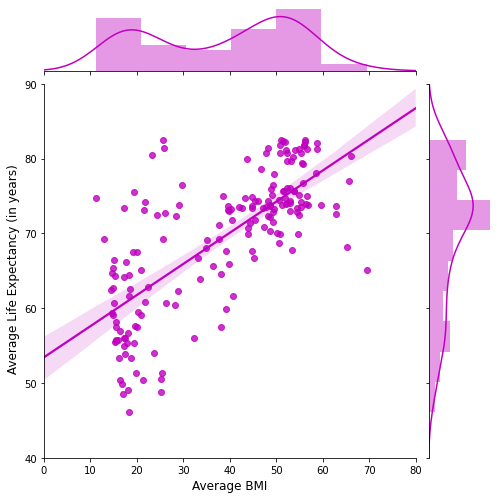

In [57]:
import seaborn as sns
#sns.set_theme(style="darkgrid")

g = sns.jointplot(x="BMI", y="Life expectancy", data=grouped_df,
                  kind="reg", truncate=False,
                  xlim=(0, 80), ylim=(40, 90),
                  color="m", height=7)
g.set_axis_labels('Average BMI', ' Average Life Expectancy (in years)', fontsize=12)
plt.show()
#the light pink shade around the linear regression line is a 95% CI of the population parameter
#mu, based on the sample, for life expectancy at each BMI along the x-axis 

#NOTE: it should be noted that this is an extensive dataframe that 'covers' the population,
#but we not only took the mean over a 15 year period which can have a strong effect on the mean given 
#it is not a robust statistic and we cannot assume that everyone who was counted is still alive and 
#that no more people have been born since 2015, thus this is a rough estimation of the global population's global 
#life expectancies and bmi by country

In [53]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(grouped_df['BMI'], grouped_df['Life expectancy'])
r_value
#intercept not meaningful for this regression
#72.38% correlation 

0.7238242629415409

In [34]:
r_squared = r_value**2
r_squared
#52.39% of the variance in life expectancy can be explained by BMI

## NOTE: higher R-squared values represent smaller differences between the observed data and the fitted values

0.5239215636228649

In [35]:
slope

0.41620230001715475

In [36]:
p_value
# Baseline belief (null hyp.) is that each independent variable (in this case one independent variable BMI)'s coefficient 
#(i.e. slope) is 0 so there is no correlation
#The p-value is strong enough for us to reject the null hypothesis and accept the alternative hypothesis that the slope/ 
#coefficient for BMI is correlated with life expectancy 

1.1623760279767996e-30

In [37]:
std_err
# about 95% of our data values should fall within +-2 standard error of the regression line, and here our average standard error 
#(i.e. the average distance of our data points from our regression model) is .0297 which is great! 
#This means the average distance from our fitted regression line is about .0297 years.

0.029654054339586258

## Statistical Analysis

The hypotheses below look at the countries grouped by upper and low BMI to investigate their developing country proportions. Doing so will help us to see if countries that are developing have lower or higher BMIs.

$H_0:$ $p_{Developed, High BMI}$ = $p_{Developing, High BMI}$ 

$H_1:$ $p_{Developed, High BMI}$ > $p_{Developing, High BMI}$

In [27]:
low_high_bmi = grouped_df
low_high_bmi
low_high_bmi.loc[(low_high_bmi.BMI < 30) ,'BMI Class']= 'Low'
low_high_bmi.loc[(low_high_bmi.BMI >= 30),'BMI Class']='High'
low_high_bmi

,Country,Status,Life expectancy,BMI,BMI Class
0,Afghanistan,Developing,58.19375,15.51875,Low
1,Albania,Developing,75.15625,49.06875,High
2,Algeria,Developing,73.61875,48.74375,High
3,Angola,Developing,49.01875,18.01875,Low
4,Antigua and Barbuda,Developing,75.05625,38.42500,High
...,...,...,...,...,...
176,Venezuela (Bolivarian Republic of),Developing,73.38750,54.48750,High
177,Viet Nam,Developing,74.77500,11.18750,Low
178,Yemen,Developing,63.86250,33.48750,High
179,Zambia,Developing,53.90625,17.45000,Low


In [28]:
contigency= pd.crosstab(grouped_df['Status'], grouped_df['BMI Class']) 
contigency

BMI Class,High,Low
Status,,
Developed,30,2
Developing,83,66


In [49]:
# Chi-square test of independence. 
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency) 
p
#p-value 

0.00012773052557789468

In [55]:
#Finding the p-value of the z-score obtained from
z_score= c**(1/2)
# z_score
p_val = 1-stats.norm.cdf(z_score)
p_val

6.386526278889804e-05

The $p$-value is less than $\alpha = .0001$ and is significant enough to reject the $H_0$. Hence, there is enough evidence to conclude that being in a developed country increases the probability of having a high BMI. Country status and BMI class (i.e. *low* and *high*) are not independent. This means that there is evidence of a status gap, and developing countries' BMIs differ significantly from that of developed countries.